# **[ 프로젝트 2 : 손글씨 숫자 이미지 인식 및 분류 ]**

**1. 개요**

* 목적

    > 손글씨로 작성된 숫자(0~9)를 인식하여 정확히 분류하는 모델을 구현한다.<br>
    > 머신러닝 및 딥러닝 모델의 성능을 비교하여 최적의 모델을 선택 및 적용한다.<br>
    > 학습 및 검증에 사용되지 않은 실제 손글씨 이미지를 사용하여 예측함으로써 모델의 실용성을 검증한다.

* 데이터셋

    > MNIST 데이터셋: 총 70,000개의 28x28 흑백 손글씨 숫자 이미지<br>
    > 테스트 데이터: 학습 및 검증에 사용되지 않은 실제 손글씨 이미지

In [ ]:
# Installing necessary packages
!pip install "dask[complete]"

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import joblib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

**2. 데이터 수집**

* 데이터셋 로드

    > fetch_openml 라이브러리를 사용하여 MNIST 데이터셋을 가져온다.


In [ ]:
# Load the MNIST dataset.
mnist_data = fetch_openml('mnist_784', version=1)

* 데이터셋 구성

In [ ]:
# Check the keys ​​of the loaded MNIST dataset.
print(mnist_data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
# Check the information ​using 'DESCR' key ​of the loaded MNIST dataset.
print(mnist_data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# Check the feature's names ​using 'feature_names' key ​of the loaded MNIST dataset.
print(mnist_data.feature_names)

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [ ]:
# Check the label's name ​using 'target_names' key ​of the loaded MNIST dataset.
print(mnist_data.target_names)

['class']


**3. 데이터 특징**

* 이미지 데이터: X

    > 28x28 픽셀 사이즈의 각 픽셀의 색상 값<br>
    > 독립 변수, Feature

* 레이블 데이터: y

    > 0~9 범주의 숫자 레이블<br>
    > 종속 변수, Target

In [ ]:
# To make data easier to handle, Organize feature and target data in the dataframe of the Pandas library.
X, y = mnist_data.data, mnist_data.target.astype('int')

In [ ]:
# Feature data
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Target data
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


**4. 데이터 분할**

* 훈련 데이터: 80% (56,000개)

* 테스트 데이터: 20% (14,000개)

In [ ]:
# 훈련용과 테스트용으로 8:2 비율로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


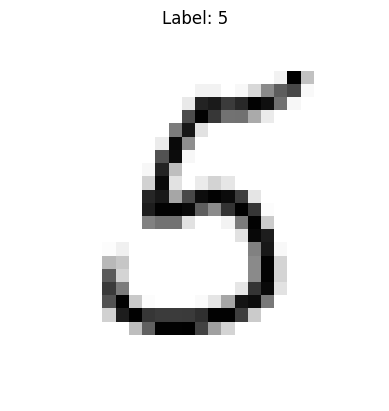

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  26  255  90  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  26  26  0  13  64  138  180  199  11  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  41  224  232  207  221  253  242  162  17  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  195  253  210  160  161  111  38  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  151  236  50  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  38  247  134  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  191  244  17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  17  224  94  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0 

In [ ]:
import sys

# 첫 번째 손글씨 이미지를 시각화한다.
first_image = X_train.iloc[0].values.reshape(28, 28)

plt.imshow(first_image, cmap='Greys')
plt.title(f"Label: {y_train.iloc[0]}")
plt.axis('off')
plt.show()

# 첫 번째 손글씨 이미지의 모든 데이터를 출력한다.
for x in first_image:
    for i in x:
        sys.stdout.write('%d  ' % i)
    sys.stdout.write('\n')

**5. 데이터 전처리**

* 정규화

    > StandardScaler 사용하여 이미지 데이터를 0~1 범위로 스케일링한다.

    > 각 모델에 맞게 데이터의 차원을 변환한다.

        - 머신러닝 모델: 평탄화된 1차원((784,)) 형태로 유지한다.
        - 딥러닝 모델: 2차원((28, 28)) 또는 3차원((28, 28, 1)) 형태로 변환한다.

* 원핫 인코딩

    > 딥러닝 모델 학습을 위해 레이블을 원핫 인코딩 처리한다.

In [ ]:
# 정규화 (0~1 범위로 스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 딥러닝 모델은 데이터를 28x28로 reshape이 필요하다.
X_train_norm = X_train.values.astype('float32') / 255.0
X_test_norm = X_test.values.astype('float32') / 255.0

X_train_reshaped = X_train_norm.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_norm.reshape(-1, 28, 28, 1)

In [ ]:
# 딥러닝 모델은 정답 데이터에 해당하는 레이블에 원핫 인코딩이 필요하다.
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

**6. 머신러닝 모델링**

* 모델 구현

    1) Logistic Regression

        > 선형 모델이다.
        > 다중 클래스 분류를 위해 소프트맥스를 사용한다.

    2) K-Nearest Neighbors(KNN)

        > 최근접 이웃 거리를 사용하여 분류한다.

    3) Support Vector Machine(SVM)

        > RBF 커널을 사용하여 비선형 분류를 지원한다.

    4) Decision Tree

        > 분기 규칙을 기반으로 한 비선형 분류 모델이다.

    5) Random Forest

        > 다수의 결정 트리를 결합한 앙상블 모델이다.

    6) XGBoost / LightGBM

        > 부스팅 기반의 고성능 머신러닝 모델이다.

* 모델 학습 및 평가

    1) 56,000개의 훈련 데이터를 사용하여 모델을 학습한다.
    
    2) 평가 지표

        > Accuracy: 모델의 정확도
        > Log Loss: 예측 확률의 신뢰성
        > Confusion Matrix: 클래스별 예측 성능 확인


Logistic Regression: Accuracy = 0.9154, Loss = 0.3765, Time = 72.89s


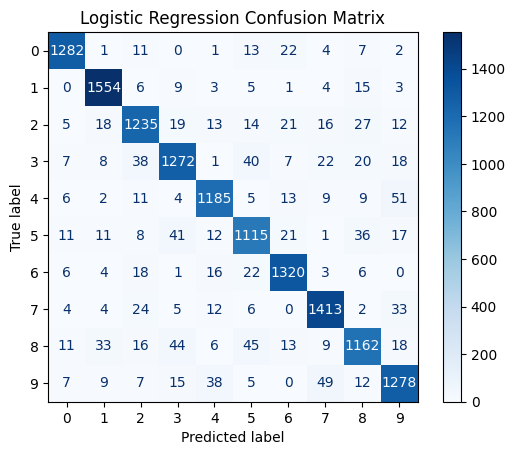

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000


KNN: Accuracy = 0.9458, Loss = 0.6714, Time = 116.08s


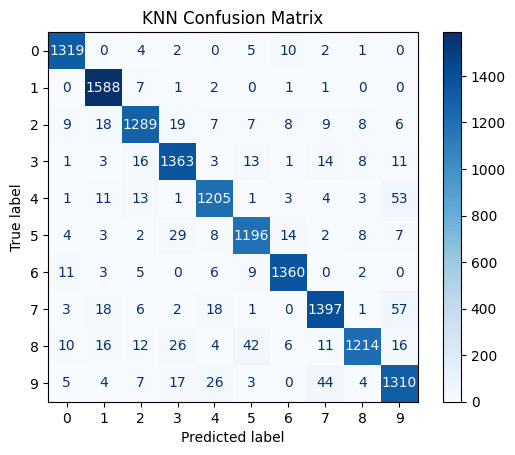

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.93      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.94      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.97      0.97      1396
           7       0.94      0.93      0.94      1503
           8       0.97      0.89      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000


SVM: Accuracy = 0.9630, Loss = 0.1221, Time = 3240.46s


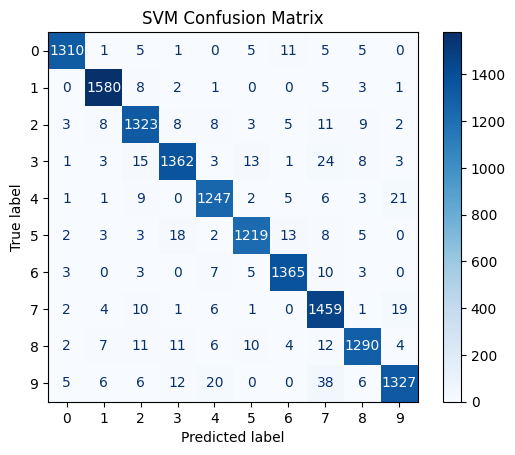

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.92      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000


Decision Tree: Accuracy = 0.8737, Loss = 4.5518, Time = 25.60s


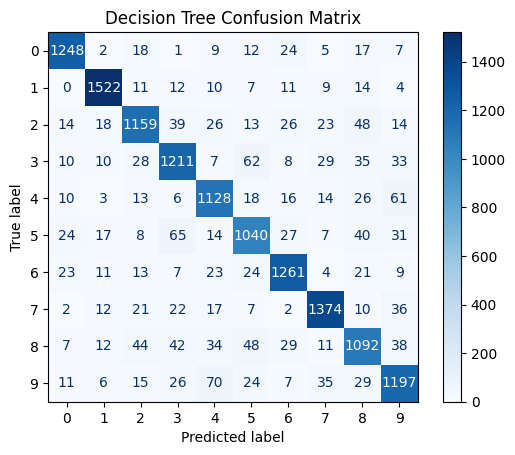

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1343
           1       0.94      0.95      0.95      1600
           2       0.87      0.84      0.86      1380
           3       0.85      0.85      0.85      1433
           4       0.84      0.87      0.86      1295
           5       0.83      0.82      0.82      1273
           6       0.89      0.90      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.82      0.80      0.81      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000


Random Forest: Accuracy = 0.9670, Loss = 0.2586, Time = 61.81s


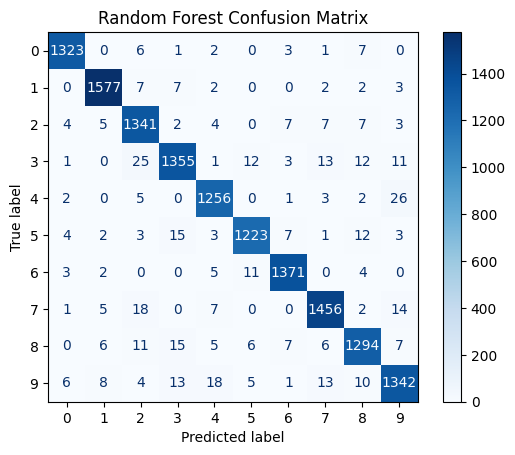

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.94      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:59:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost: Accuracy = 0.9781, Loss = 0.0733, Time = 609.11s


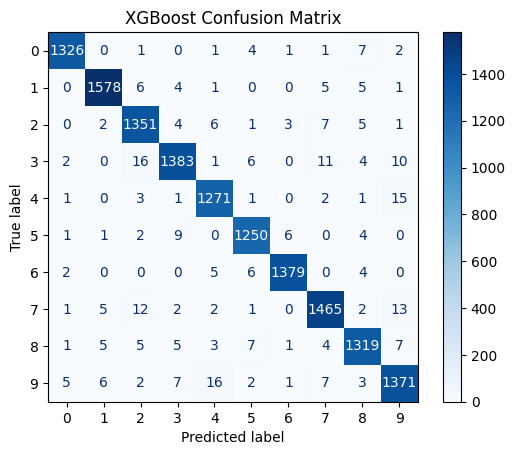

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.97      0.98      1503
           8       0.97      0.97      0.97      1357
           9       0.97      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.608189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111332
[LightGBM] [Info] Number of data points in 

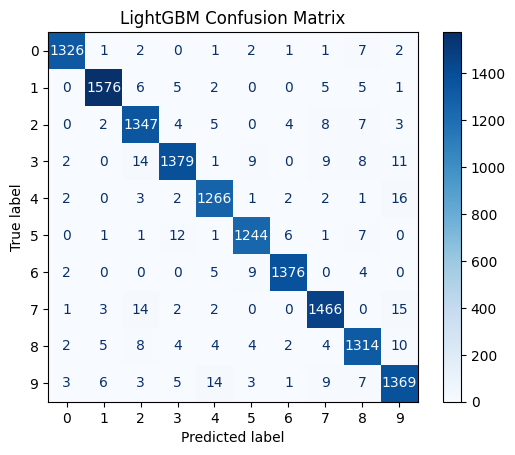

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.98      0.99      1600
           2       0.96      0.98      0.97      1380
           3       0.98      0.96      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.97      0.97      0.97      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 모델별 결과 저장
results = {}

# 머신러닝 모델 리스트
models_ml = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', gamma='scale', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier()
}

for name, model in models_ml.items():
    start = time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    end = time()
    acc = accuracy_score(y_test, y_pred)
    loss = log_loss(y_test, y_pred_proba)
    results[name] = {'accuracy': acc, 'loss': loss, 'time': end - start}
    print(f"\n{name}: Accuracy = {acc:.4f}, Loss = {loss:.4f}, Time = {end - start:.2f}s")

    # Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # Check the Classification Report
    print(classification_report(y_test, y_pred))

**7. 딥러닝 모델링**

* 모델 구현

    1) Fully Connected Neural Network(FNN)

        입력: 28x28 크기의 평탄화된 데이터
        구조: Dense(128 노드, ReLU) → Dense(64 노드, ReLU) → Dense(10 노드, Softmax)
        손실 함수: categorical_crossentropy
        옵티마이저: Adam
        
        > Dense 레이어 기반으로 구성된다.
        > 입력 데이터를 평탕화하여 처리한다.

    2) Convolutional Neural Network(CNN)

        입력: 28x28 크기의 데이터 (1 채널).
        구조: Conv2D(32 필터, 3x3) → MaxPooling2D(2x2) → Flatten → Dense(128 노드, ReLU) → Dense(10 노드, Softmax)
        손실 함수: categorical_crossentropy
        옵티마이저: Adam

        > Conv2D, MaxPolling2D로 이미지 공간적 특징을 학습한다.

    3) RNN, LSTM, GRU

        입력: (28 타임스텝, 28 특성)으로 간주한다.
        구조: RNN/LSTM/GRU(128 유닛, tanh) → Dense(64 노드, ReLU) → Dense(10 노드, Softmax)
        손실 함수: categorical_crossentropy
        옵티마이저: Adam

        > 28x28 크기의 이미지를 시퀀스로 처리한다.

    4) Autoencoder

        입력: 평탄화된 데이터(784)
        구조:
            인코더 - Dense(128 → 64 → 32, ReLU)
            디코더 - Dense(32 → 64 → 128, ReLU → 784, Sigmoid)
        손실 함수: binary_crossentropy
        옵티마이저: Adam
        목적: 입력 데이터 복원

        > 입력 데이터 압축 및 복원을 통해 특징을 학습한다.

    5) Vision Transformer(ViT)

        입력: (28x28x1) 이미지를 7x7 패치로 나눈다.
        구조: 패치 분할 → Multi-Head Attention → Dense(128 노드) → Flatten → Dense(10 노드, Softmax)
        손실 함수: categorical_crossentropy
        옵티마이저: Adam

        > 이미지를 패치로 분할하여 Transformer 아키텍처로 처리한다.

* 모델 학습 및 평가

    1) 56,000개의 훈련 데이터를 사용하여 모델을 학습한다.

    2) 평가 지표

        > Accuracy: 테스트 정확도
        > Loss: 테스트 손실

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7646 - loss: 0.7821 - val_accuracy: 0.9403 - val_loss: 0.2006
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9554 - loss: 0.1509 - val_accuracy: 0.9572 - val_loss: 0.1507
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9719 - loss: 0.0953 - val_accuracy: 0.9614 - val_loss: 0.1357
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9820 - loss: 0.0636 - val_accuracy: 0.9613 - val_loss: 0.1403
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9878 - loss: 0.0496 - val_accuracy: 0.9659 - val_loss: 0.1269
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9922 - loss: 0.0316 - val_accuracy: 0.9672 - val_loss: 0.1301
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9953 - loss: 0.0213 - val_accuracy: 0.9691 - val_loss: 0.1308
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9972 - loss: 0.0162 - val_accur

<Figure size 640x480 with 0 Axes>

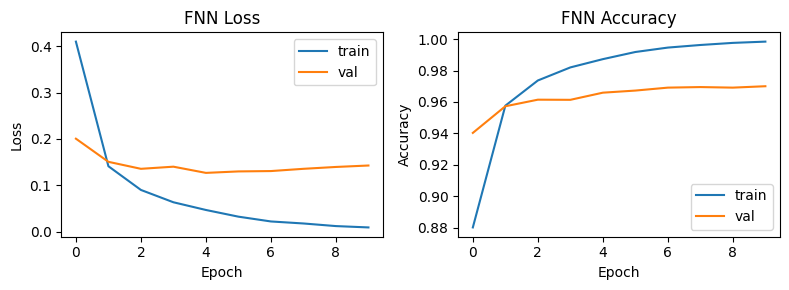


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - accuracy: 0.8355 - loss: 0.6369 - val_accuracy: 0.9581 - val_loss: 0.1442
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 36s 207ms/step - accuracy: 0.9660 - loss: 0.1205 - val_accuracy: 0.9740 - val_loss: 0.0861
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 44s 221ms/step - accuracy: 0.9813 - loss: 0.0671 - val_accuracy: 0.9745 - val_loss: 0.0847
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 33s 187ms/step - accuracy: 0.9844 - loss: 0.0566 - val_accuracy: 0.9812 - val_loss: 0.0605
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 181ms/step - accuracy: 0.9889 - loss: 0.0388 - val_accuracy: 0.9834 - val_loss: 0.0552
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 36s 150ms/step - accuracy: 0.9904 - loss: 0.0322 - val_accuracy: 0.9826 - val_loss: 0.0554
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - accuracy: 0.9935 - loss: 0.0252 - val_accuracy: 0.9830 - val_loss: 0.0542
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.9929 - loss: 

<Figure size 640x480 with 0 Axes>

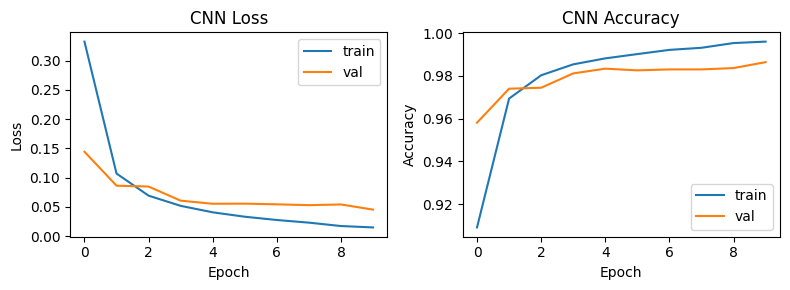

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# 딥러닝 모델 - FNN, CNN
models_dl = {
    "FNN": Sequential([
        Dense(128, activation='relu', input_shape=(28*28,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]),
    "CNN": Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])}

for name, model in models_dl.items():
    start = time()

    if name == "FNN":
        X_train_dl = X_train_scaled
        X_test_dl = X_test_scaled
    else:
        X_train_dl = X_train_reshaped
        X_test_dl = X_test_reshaped

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_dl, y_train_categorical, epochs=10, batch_size=256, validation_split=0.2, verbose=1)
    end = time()
    loss, acc = model.evaluate(X_test_dl, y_test_categorical, verbose=1)
    results[name] = {'accuracy': acc, 'loss': loss, 'time': time() - start}
    print(f"{name}: Accuracy = {acc:.4f}, Loss = {loss:.4f}, Time = {time() - start:.2f}s\n")

    # 학습 결과 시각화
    plt.clf()
    plt.figure(figsize=(8,3))

    plt.subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc='upper right')

    plt.subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    plt.tight_layout()
    plt.show()

    print()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.6708 - loss: 1.0386 - val_accuracy: 0.8929 - val_loss: 0.3540
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.9217 - loss: 0.2574 - val_accuracy: 0.9335 - val_loss: 0.2168
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.9457 - loss: 0.1796 - val_accuracy: 0.9477 - val_loss: 0.1743
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.9536 - loss: 0.1541 - val_accuracy: 0.9538 - val_loss: 0.1624
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.9604 - loss: 0.1322 - val_accuracy: 0.9541 - val_loss: 0.1543
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9621 - loss: 0.1262 - val_accuracy: 0.9588 - val_loss: 0.1411
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.9678 - loss: 0.1061 - val_accuracy: 0.9568 - val_loss: 0.1389
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.9668 - loss: 0.1087 - 

<Figure size 640x480 with 0 Axes>

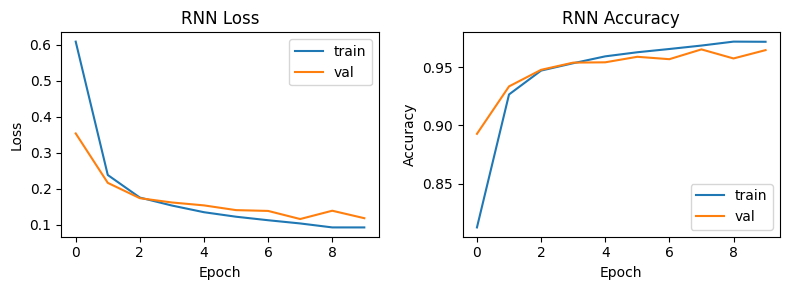


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 31s 169ms/step - accuracy: 0.5159 - loss: 1.4042 - val_accuracy: 0.9179 - val_loss: 0.2744
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 144ms/step - accuracy: 0.9231 - loss: 0.2436 - val_accuracy: 0.9481 - val_loss: 0.1776
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 28s 161ms/step - accuracy: 0.9528 - loss: 0.1525 - val_accuracy: 0.9587 - val_loss: 0.1420
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 157ms/step - accuracy: 0.9632 - loss: 0.1202 - val_accuracy: 0.9565 - val_loss: 0.1346
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.9693 - loss: 0.1033 - val_accuracy: 0.9674 - val_loss: 0.1059
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - accuracy: 0.9760 - loss: 0.0794 - val_accuracy: 0.9701 - val_loss: 0.0952
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 26s 148ms/step - accuracy: 0.9783 - loss: 0.0722 - val_accuracy: 0.9766 - val_loss: 0.0806
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.9807 - loss: 

<Figure size 640x480 with 0 Axes>

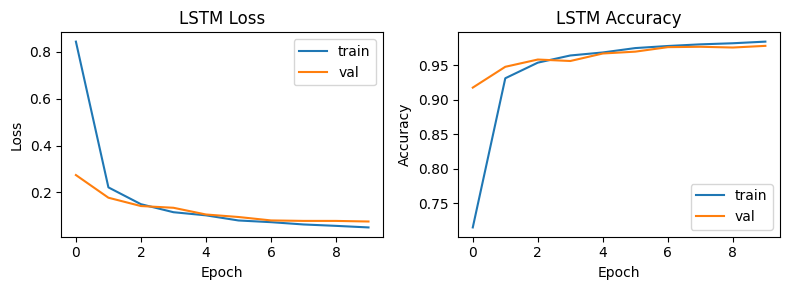


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 35s 187ms/step - accuracy: 0.4467 - loss: 1.6278 - val_accuracy: 0.8583 - val_loss: 0.4676
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 182ms/step - accuracy: 0.8805 - loss: 0.3880 - val_accuracy: 0.9246 - val_loss: 0.2493
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.9373 - loss: 0.2065 - val_accuracy: 0.9495 - val_loss: 0.1650
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 180ms/step - accuracy: 0.9561 - loss: 0.1468 - val_accuracy: 0.9574 - val_loss: 0.1388
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 33s 189ms/step - accuracy: 0.9639 - loss: 0.1194 - val_accuracy: 0.9635 - val_loss: 0.1172
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 43s 203ms/step - accuracy: 0.9692 - loss: 0.0992 - val_accuracy: 0.9674 - val_loss: 0.1082
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 191ms/step - accuracy: 0.9737 - loss: 0.0853 - val_accuracy: 0.9750 - val_loss: 0.0810
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 181ms/step - accuracy: 0.9785 - loss: 

<Figure size 640x480 with 0 Axes>

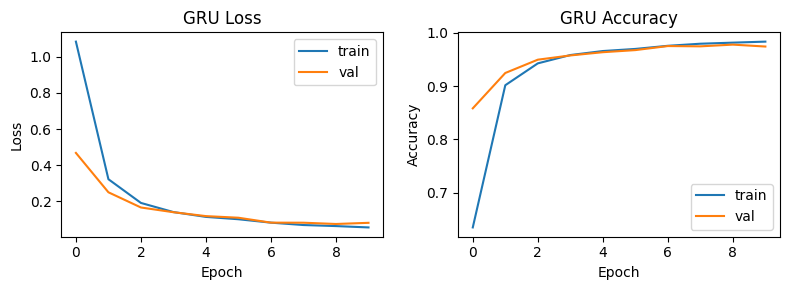

In [ ]:
# 딥러닝 모델 - RNN, LSTM, GRU
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

models_dl["RNN"] = Sequential([
    SimpleRNN(128, activation='tanh', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])
models_dl["LSTM"] = Sequential([
    LSTM(128, activation='tanh', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])
models_dl["GRU"] = Sequential([
    GRU(128, activation='tanh', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

for name, model in models_dl.items():
    if name in ["RNN", "LSTM", "GRU"]:
        start = time()

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=256, validation_split=0.2, verbose=1)
        loss, acc = model.evaluate(X_test_reshaped, y_test_categorical, verbose=1)
        results[name] = {'accuracy': acc, 'loss': loss, 'time': time() - start}
        print(f"{name}: Accuracy = {acc:.4f}, Loss = {loss:.4f}, Time = {time() - start:.2f}s\n")

        # 학습 결과 시각화
        plt.clf()
        plt.figure(figsize=(8,3))

        plt.subplot(121)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f'{name} Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['train', 'val'], loc='upper right')

        plt.subplot(122)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f'{name} Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['train', 'val'], loc='lower right')
        plt.tight_layout()
        plt.show()

        print()

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.3457 - val_loss: 0.1723
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.1620 - val_loss: 0.1399
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 0.1364 - val_loss: 0.1259
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.1234 - val_loss: 0.1185
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1177 - val_loss: 0.1145
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.1139 - val_loss: 0.1113
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1109 - val_loss: 0.1082
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1077 - val_loss: 0.1060
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1056 - val_loss: 0.1038
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1034 - val_loss: 0.1020
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


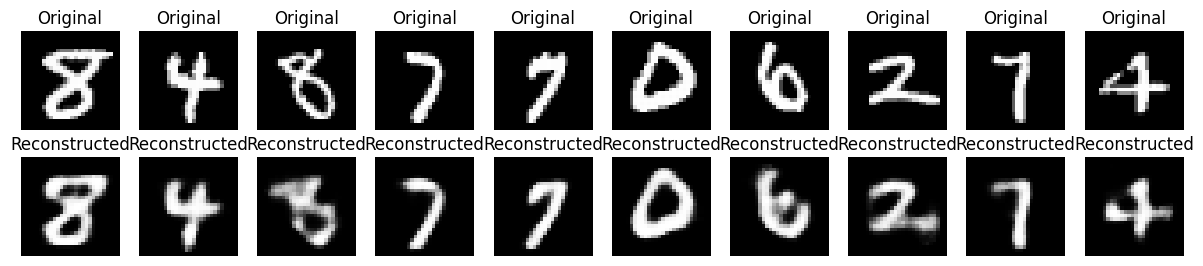

<Figure size 640x480 with 0 Axes>

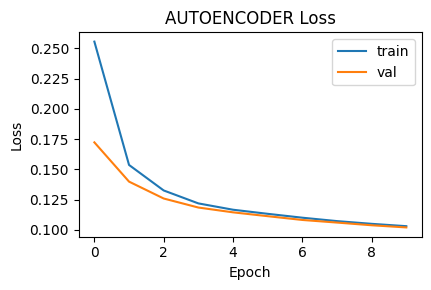

In [ ]:
# 딥러닝 모델 - AUTOENCODER
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Reshape, Input

# 정규화: AUTOENCODER 입력 형태
X_train_reshaped_ae = X_train_norm.reshape(-1, 28*28)
X_test_reshaped_ae = X_test_norm.reshape(-1, 28*28)

# 모델 구성
input_dim = X_train_reshaped_ae.shape[1]  # 784

# 인코더
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# 디코더
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# 모델 학습
start = time()
models_dl['AUTOENCODER'] = Model(inputs=input_layer, outputs=decoded)
models_dl['AUTOENCODER'].compile(optimizer='adam', loss='binary_crossentropy')
history = models_dl['AUTOENCODER'].fit(X_train_reshaped_ae, X_train_reshaped_ae, epochs=10, batch_size=256, validation_data=(X_test_reshaped_ae, X_test_reshaped_ae), verbose=1)

# test_loss, test_acc = autoencoder.evaluate(X_test_reshaped_ae, X_test_reshaped_ae)
# results['AUTOENCODER'] = {'accuracy': null, 'loss': test_loss, 'time': time() - start}
# print(f"AUTOENCODER: Accuracy = {null}, Loss = {test_loss:.4f}, Time = {time() - start:.2f}s\n")

# 재구성 결과 확인
decoded_imgs = models_dl['AUTOENCODER'].predict(X_test_reshaped_ae)
mse = np.mean(np.power(X_test_reshaped_ae - decoded_imgs, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'class': y_test_categorical.argmax(axis=1)})
error_df.reset_index(inplace=True)

n = 10  # 몇 개의 이미지를 표시할지
plt.figure(figsize=(15, 3))
for i in range(n):
    # 원본
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_reshaped_ae[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # 재구성
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

plt.clf()
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('AUTOENCODER Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# 딥러닝 모델 - Vision Transformer
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# 패치 분할을 위한 Lambda 레이어 정의
def extract_patches(inputs, patch_size):
    patches = tf.image.extract_patches(
        images=inputs,
        sizes=[1, patch_size, patch_size, 1],
        strides=[1, patch_size, patch_size, 1],
        rates=[1, 1, 1, 1],
        padding='VALID'
    )
    patch_dim = patches.shape[-1]
    patches = tf.reshape(patches, [-1, patches.shape[1] * patches.shape[2], patch_dim])
    return patches

# Transformer 블록 정의
def transformer_block(inputs, num_heads, ff_dim, dropout=0.1):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = LayerNormalization(epsilon=1e-6)(inputs + attention)

    ff = Dense(ff_dim, activation="relu")(attention)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Dropout(dropout)(ff)
    outputs = LayerNormalization(epsilon=1e-6)(attention + ff)
    return outputs

# Vision Transformer 모델 정의
def create_vit_model(input_shape, num_classes, patch_size=7):
    inputs = Input(shape=input_shape)
    patches = Lambda(extract_patches, arguments={'patch_size': patch_size})(inputs)  # Lambda 레이어 사용
    transformer = transformer_block(patches, num_heads=4, ff_dim=128)
    transformer = Flatten()(transformer)
    outputs = Dense(num_classes, activation='softmax')(transformer)

    model = Model(inputs, outputs)
    return model


# 모델 학습 및 평가
models_dl['ViT'] = create_vit_model((28, 28, 1), 10)
start = time()
models_dl['ViT'].compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
models_dl['ViT'].fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=256, validation_split=0.2, verbose=1)
test_loss, test_acc = models_dl['ViT'].evaluate(X_test_reshaped, y_test_categorical, verbose=1)
results['ViT'] = {'accuracy': test_acc, 'loss': test_loss, 'time': time() - start}
print(f"ViT: Accuracy = {test_acc:.4f}, Loss = {test_loss:.4f}, Time = {time() - start:.2f}s\n")

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 30s 147ms/step - accuracy: 0.7099 - loss: 0.9143 - val_accuracy: 0.9237 - val_loss: 0.2562
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 154ms/step - accuracy: 0.9306 - loss: 0.2349 - val_accuracy: 0.9538 - val_loss: 0.1590
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 37s 130ms/step - accuracy: 0.9544 - loss: 0.1503 - val_accuracy: 0.9651 - val_loss: 0.1211
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 144ms/step - accuracy: 0.9661 - loss: 0.1128 - val_accuracy: 0.9691 - val_loss: 0.1033
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.9741 - loss: 0.0905 - val_accuracy: 0.9717 - val_loss: 0.0941
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - accuracy: 0.9767 - loss: 0.0783 - val_accuracy: 0.9737 - val_loss: 0.0879
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.9783 - loss: 0.0717 - val_accuracy: 0.9737 - val_loss: 0.0844
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 29s 168ms/step - accuracy: 0.9808 - loss: 0


**8. 모델 결과 비교**

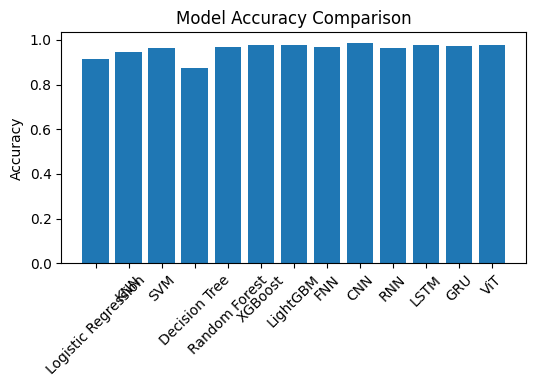

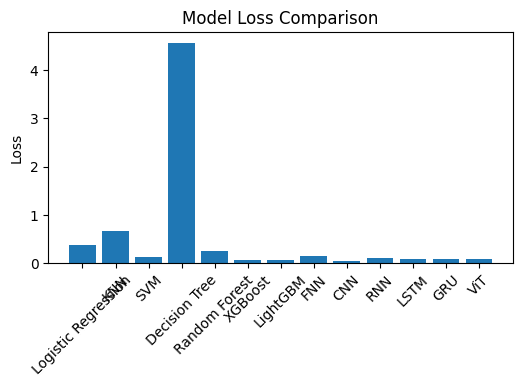

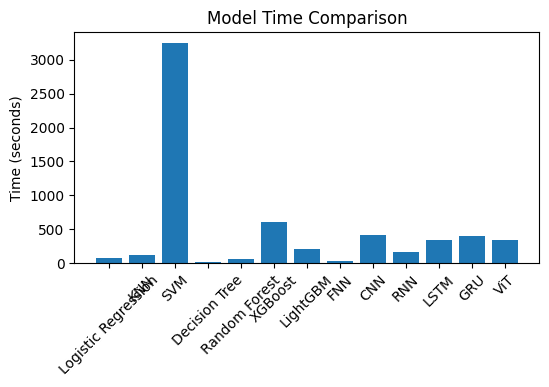

In [ ]:
accuracies = [results[model]['accuracy'] for model in results.keys()]
losses = [results[model]['loss'] for model in results.keys()]
times = [results[model]['time'] for model in results.keys()]

plt.figure(figsize=(6, 3))
plt.bar(results.keys(), accuracies)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(results.keys(), losses)
plt.title("Model Loss Comparison")
plt.xticks(rotation=45)
plt.ylabel("Loss")
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(results.keys(), times)
plt.title("Model Time Comparison")
plt.xticks(rotation=45)
plt.ylabel("Time (seconds)")
plt.show()

**9. 모델 선택**

In [ ]:
# 최적의 모델 저장
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Model: {best_model_name} with Accuracy = {results[str(best_model_name)]['accuracy']:.4f}")
if best_model_name in models_ml:
    joblib.dump(models_ml[str(best_model_name)], f'bestmodel_{best_model_name}.pkl')
else:
    models_dl[str(best_model_name)].save(f'/content/drive/MyDrive/Colab Notebooks/PORTFOLIO-GITHUB/SideProjects/MLDL/models/bestmodel_{best_model_name}.keras')

Best Model: CNN with Accuracy = 0.9844


10. 모델 추론 및 예측

* 입력 데이터

    > 학습 및 검증에 사용되지 않은 실제 손글씨 이미지

* 처리 과정

    > 여러 손글씨 숫자가 모여 있는 이미지를 분할한다.<br>
    > 픽셀 값을 반전시킨다.<br>
    > 저장된 모델에 입력하여 분류 확률을 계산한다.

* 결과 시각화

    > 각 숫자의 예측 확률과 최종 분류 레이블 출력한다.

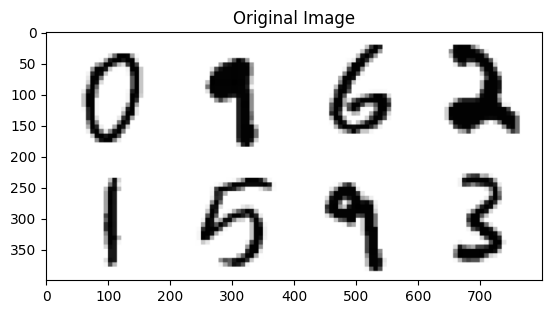

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The prediction are  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The answer is  0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The prediction are  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
The answer is  9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The prediction are  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
The answer is  6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The prediction are  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The answer is  2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The prediction are  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
The answer is  1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The prediction are  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
The answer is  8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The prediction are  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
The answer is  9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The prediction are  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
The answer is  3



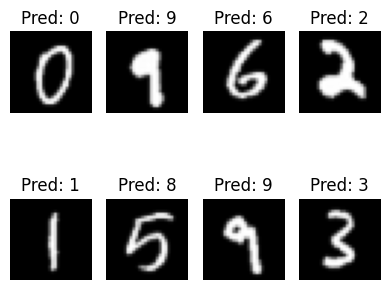

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image

# 1. 이미지 불러오기
uploaded_image_path = '/content/drive/MyDrive/Colab Notebooks/PORTFOLIO-GITHUB/SideProjects/MLDL/images/handwritten_nums.png'  # 이미지 파일 경로
orginal_img = Image.open(uploaded_image_path)   # 원본 이미지
converted_img = orginal_img.convert('L')  # 흑백 변환
img_array = np.array(converted_img)
plt.imshow(orginal_img)
plt.title('Original Image')
plt.show()

# 2. 이미지 분할 (4x2)
num_rows, num_cols = 2, 4
digit_images = []

row_height = img_array.shape[0] // num_rows
col_width = img_array.shape[1] // num_cols

for i in range(num_rows):
    for j in range(num_cols):
        digit = img_array[i*row_height:(i+1)*row_height, j*col_width:(j+1)*col_width]
        digit_resized = np.array(Image.fromarray(digit).resize((28, 28)))  # 28x28로 리사이즈

        # 픽셀 값 반전
        digit_inverted = 255 - digit_resized
        digit_images.append(digit_inverted)

flattened_images = [digit_image.flatten() for digit_image in digit_images]  # 모든 이미지 평탄화
# print(np.array(flattened_images).shape)  # (8, 784) - 8개의 1차원 배열
test_data = pd.DataFrame(flattened_images, columns=mnist_data.feature_names)

# 3. 저장된 학습 모델 로드
best_model = load_model(f'/content/drive/MyDrive/Colab Notebooks/PORTFOLIO-GITHUB/SideProjects/MLDL/models/bestmodel_{best_model_name}.keras', compile=False)

# 4. 전처리 및 예측
predictions = []
for digit_image in flattened_images:
    # digit_image = digit_image.astype('float32') / 255   # 정규화
    digit_image = digit_image.reshape(-1, 28, 28, 1)     # CNN 입력 형태
    # pred = best_model.predict(digit_image).argmax(axis=1)[0]   # 클래스 예측
    pred = best_model.predict(digit_image, batch_size=32)   # 클래스 예측
    predictions.append(pred)

    print("The prediction are ", pred[0])
    print("The answer is ", np.argmax(pred[0]))
    print()

# print("Predicted Labels:", predictions)

# 5. 예측 결과
pred_class = []
fig, axes = plt.subplots(2, 4, figsize=(4, 4))
axes = axes.ravel()
for idx, pred in enumerate(predictions):
    # print(f"Digit {idx + 1} Prediction:")
    # for class_idx, prob in enumerate(pred[0]):
    #     print(f"Class {class_idx}: {prob:.4f}")
    # print(f"Predicted Label: {np.argmax(pred[0])}")
    pred_class.append(np.argmax(pred[0]))

    axes[idx].imshow(digit_images[idx], cmap='gray')
    axes[idx].set_title(f"Pred: {np.argmax(pred[0])}")
    axes[idx].axis('off')
plt.tight_layout()
plt.show()

pred_class = pd.DataFrame(pred_class)
test_data = pd.concat([test_data, pred_class], axis=1)
test_data

**11. 결론 및 제안**

* 결론

    > 딥러닝 모델 중에서 CNN과 Transformer 기반 모델이 가장 높은 성능을 달성하고 있다.<br>
    > 머신러닝 모델 중에서 LightGBM과 XGBoost의 부스팅 기반 모델이 우수한 결과를 보이고 있다.

* 제안

    > 하이퍼파라미터 튜닝으로 정확도를 향상시킴으로써 모델 성능을 개선하여 최적화할 수 있다.<br>
    > 실제 손글씨 데이터 확장으로 모델의 일반화 성능 검증이 가능하다.<br>
    > 더 큰 데이터셋에 대한 최신 모델(ViT, EfficientNet 등)을 사용하여 새로운 아키텍처를 실험할 수 있다.